In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import lumicks.pylake as lk

%matplotlib inline

# Kinesin Walking on Microtubule with Force Clamp

In this assay we had microtubules on the surface. We trapped beads with Kinesin (molecular motor) and had ATP inside the assay. As we lowered the kinesin-coated beads on top of a microtubule, it attached to it and started stepping on the microtubule. Kinesins were pulling the bead out of the center of the trap and thus increasing the force on the bead.

At a certain (set) force, we turn the force clamp on and the nanostage moves towards the motion of the bead. Here the force stays constant, and we get an idea of how the motor steps by looking at the motion of the nanostage.

With IRM, you can see unlabeled microtubules and the kinesin-coated bead on top of one of them.

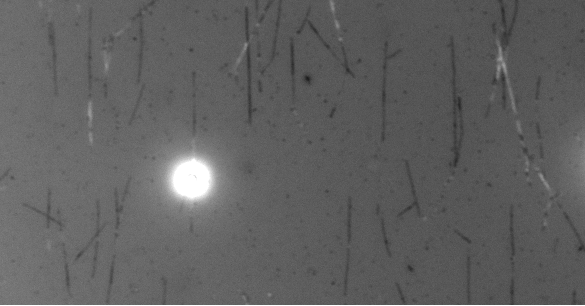

Download the files with [`download_from_doi()`](https://lumicks-pylake.readthedocs.io/en/stable/examples/cst/../../_api/lumicks.pylake.download_from_doi.html#lumicks.pylake.download_from_doi):

In [ ]:
lk.download_from_doi("10.5281/zenodo.12666579", "data")

Open the [`File`](https://lumicks-pylake.readthedocs.io/en/stable/examples/cst/../../_api/lumicks.pylake.File.html#lumicks.pylake.File):

In [ ]:
file = lk.File("data/stepping_closed_loop.h5")

Load the data:

In [ ]:
# Force in the y direction (pN)
force1y = file["Force HF"]["Force 1y"]["6s":"8.5s"]

Load and calibrate the nanostage signal:

In [ ]:
# Nanostage position in the y direction (V)
nano_y = file["Diagnostics"]["Nano Y"]["6s":"8.5s"]

# this is determined for each nanostage and it has 3 different conversion factors for the 3 directions (x,y,z)
nano_calibration_factor = 50000 / (1.849-0.04933)  # nm/V
nano_y = nano_y * nano_calibration_factor - 2000

<div class="alert alert-block alert-info"><b>Note: </b>On newer systems, the nanostage channels are located in `file["Nanostage position"]["X"]`, `file["Nanostage position"]["Y"]` and `file["Nanostage position"]["Z"]`. They are also already calibrated in the factory, so the manual application of the calibration factor from volts to nanometers is no longer required.</div>

Downsample the data using [`downsampled_by()`](https://lumicks-pylake.readthedocs.io/en/stable/examples/cst/../../_api/lumicks.pylake.channel.Slice.html#lumicks.pylake.channel.Slice.downsampled_by):

In [ ]:
sample_rate = file["Diagnostics"]["Nano Y"].sample_rate
downsampled_rate = 100  # Hz
downsample_factor = int(sample_rate / downsampled_rate)

# downsample the force, nanostage position and time
force1y_downsamp = force1y.downsampled_by(downsample_factor)
nano_y_downsamp = nano_y.downsampled_by(downsample_factor)

## Force versus Time

Next, we plot the data using [`plot()`](https://lumicks-pylake.readthedocs.io/en/stable/examples/cst/../../_api/lumicks.pylake.channel.Slice.html#lumicks.pylake.channel.Slice.plot):

In [ ]:
plt.figure(figsize=(10, 5))
force1y.plot()
force1y_downsamp.plot()
plt.ylabel("Force 1y (pN)");

Determine force fluctuations:

In [ ]:
print(f"Mean force is: {np.mean(force1y_downsamp.data):.2f} pN")
print(f"Variation in the force is: {np.std(force1y_downsamp.data):.2f} pN")

Here we see that the force stay at 1.7 pN and stays relatively constant.

## Nanostage position versus time

We can now [`plot()`](https://lumicks-pylake.readthedocs.io/en/stable/examples/cst/../../_api/lumicks.pylake.channel.Slice.html#lumicks.pylake.channel.Slice.plot) the data:

In [ ]:
fig = plt.figure(figsize=(5, 5))

# plot position versus time
ax = plt.subplot(1, 1, 1)
nano_y_downsamp.plot()

plt.xlim([0, 2])
plt.ylim([60, 160])

# create y-ticks for axis
lims2 = np.arange(14) * 8 + 60
ax.set_yticks(lims2)

# add grid to the graph
ax.yaxis.grid()

# label axis
ax.set_xlabel("Time (s)")
plt.title("Nanostage position")
plt.ylabel("Nanostage position (nm)")